In [65]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [67]:
PROJECT_PATH = '../'
import sys
sys.path.insert(0, PROJECT_PATH)

In [68]:
from PIML.box.boxWR import BoxWR

In [69]:
b = BoxWR()

#220 R=1000.00
(2204,) (220,)
sky_H (2204,)
snr2nl-SN [118.36511806290223, 126.43542909949568, 126.19278367193178, 109.7742722291957, 99.00123202697678, 82.00257252430589, 74.44037606583458, 46.286434461921196, 23.827726724918577, 10.009192192906355, 6.376586782204838]
Top10 eigs [105.32   7.07   5.2    1.44   1.21   0.76   0.57   0.49   0.35   0.28]
Building RBF with gaussan kernel on data shape (2880,)
Building RBF with gaussan kernel on data shape (2880, 10)


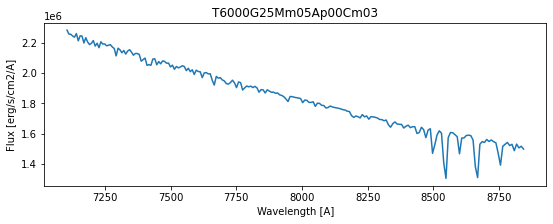

In [70]:
W="RedM"; R="R"; Res=5000;step=10;
b.init(W,R, Res,step, onPCA=1)

In [71]:
NL, NL2 = 100, 30
b.estimate_snr(NL), b.estimate_snr(NL2)

(9.871877953134684, 30.027468137778378)

noise_level 100


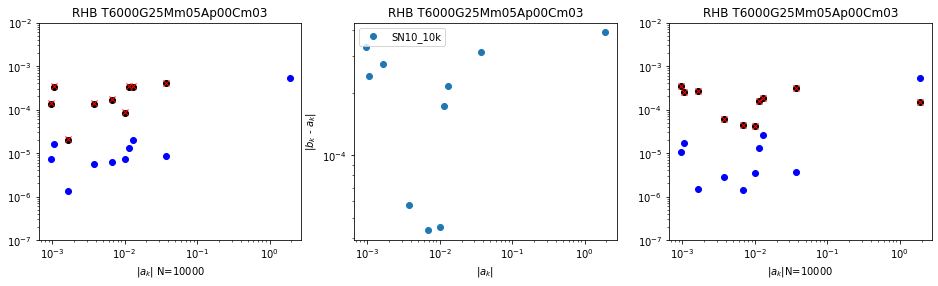

In [303]:
diff_10k_100, bias_10k_100, bias_10k_100X = b.eval_pca_bias(b.PhyMid, 10000, noise_level=NL)
b.plot_bias_evals([diff_10k_100], bias_10k_100,biasX= bias_10k_100X, pmt=None, diff_labels=["SN10_10k","SN30_10k","SN10_1M"], N=10000)

In [294]:
diff_10k_100, bias_10k_100, bias_10k_100X = b.eval_pca_bias(b.PhyMid, 10000, noise_level=NL)
# diff_10k_30, bias_10k_30, bias_10k_30X = b.eval_pca_bias(b.PhyMid, 10000, noise_level=NL2)
# diff_1M_100, bias_1M_100, bias_10k_100X = b.eval_pca_bias(b.PhyMid, 1000000, noise_level=NL)

noise_level 100
noise_level 30
noise_level 100


In [304]:
diffs = [diff_10k_100, diff_10k_30, diff_1M_100]

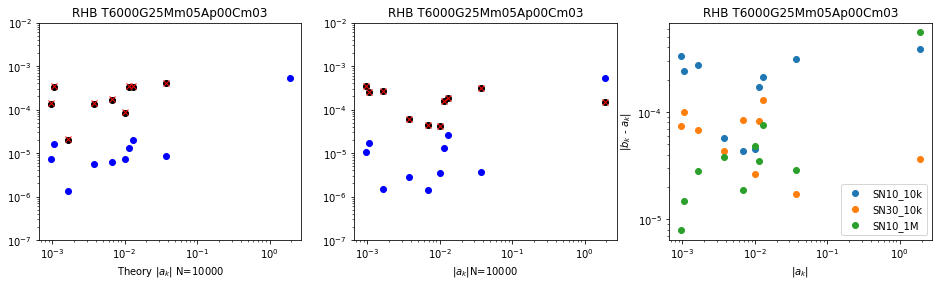

In [305]:
b.plot_bias_evals(diffs, bias_10k_100,biasX= bias_10k_100X, pmt=None, diff_labels=["SN10_10k","SN30_10k","SN10_1M"], N=10000)

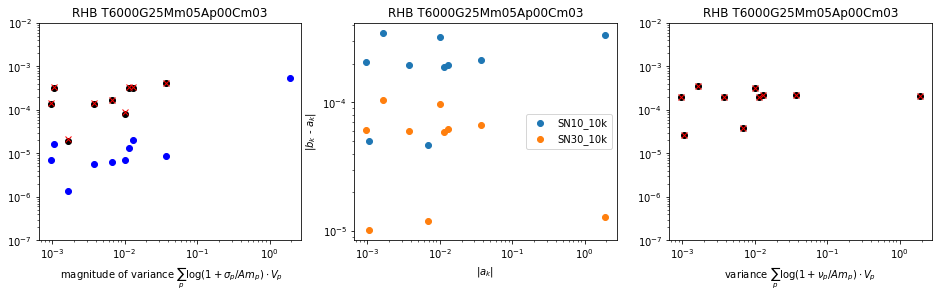

In [240]:
b.plot_bias_evals(diffs, bias_10k_100,biasX= bias_10k_100X, pmt=None, diff_labels=["SN10_10k","SN30_10k","SN10_1M"])

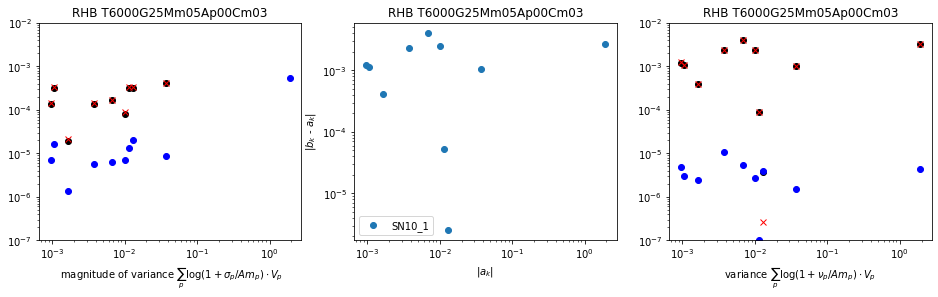

In [241]:
b.plot_bias_evals([diff], bias1,biasX= bias1X, pmt=None, diff_labels=["SN10_1","SN30_10k","SN10_1M"])

In [ ]:
nu = (obsfluxs - b.interp_obs_fn(pmt))
obssig = obsvar **0.5
X = nu / obssig

In [138]:
biass = b.interp_bias_fn(stdmag, X=X)

In [171]:
AModel =  b.interp_obs_fn(pmt, log=0)

In [191]:
stdmag = b.interp_stdmag_fn(pmt, noise_level)


In [301]:
 bias1k, bias1kX

((array([ 0.00020829, -0.00015779,  0.00014338, -0.00016252, -0.00035759,
          0.00016052, -0.0002919 ,  0.00014485,  0.0002116 , -0.00019231]),
  array([ 0.00020837, -0.00015777,  0.00014339, -0.00016248, -0.00035758,
          0.00016048, -0.00029193,  0.00014486,  0.0002116 , -0.00019231]),
  array([ 7.89004536e-08,  2.91606356e-08,  9.51991691e-09,  4.58034430e-08,
          5.22522110e-09, -3.62186116e-08, -2.92237493e-08,  1.24589322e-08,
          2.58164007e-09, -1.64779778e-09])),
 (array([ 0.00020829, -0.00015779,  0.00014338, -0.00016252, -0.00035759,
          0.00016052, -0.0002919 ,  0.00014485,  0.0002116 , -0.00019231]),
  array([ 0.00020837, -0.00015777,  0.00014339, -0.00016248, -0.00035758,
          0.00016048, -0.00029193,  0.00014486,  0.0002116 , -0.00019231]),
  array([ 5.31900720e-04, -2.94286722e-05,  7.22496609e-06,  2.61039595e-06,
         -1.19241504e-06, -2.14671267e-06,  8.01163044e-06,  1.58855024e-05,
          6.19397552e-06,  5.52675837e-06])))

noise_level 100


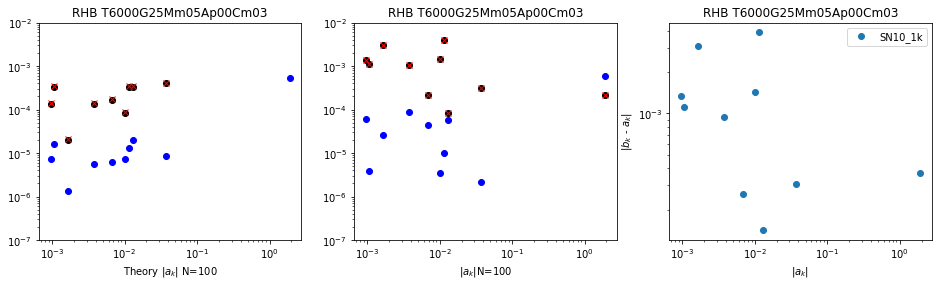

In [310]:
N=100
diff1k, bias1k, bias1kX = b.eval_pca_bias(pmt, N, noise_level=100, snr=None)
b.plot_bias_evals([diff1k], bias1k,biasX= bias1kX, pmt=None, diff_labels=["SN10_1k","SN30_10k","SN10_1M"], N=N)

noise_level 100


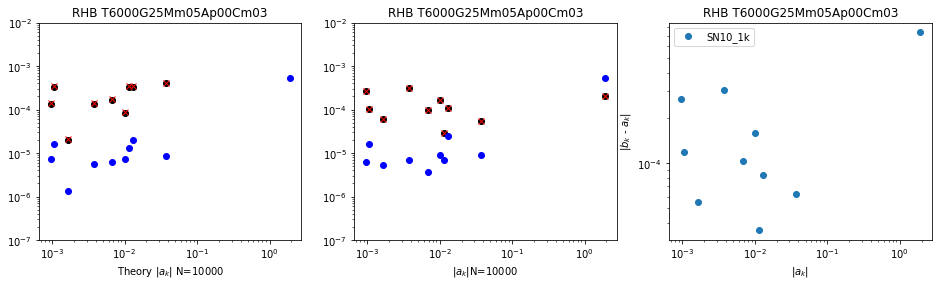

In [316]:
N=10000
diff1k, bias1k, bias1kX = b.eval_pca_bias(pmt, N, noise_level=100, snr=None)
b.plot_bias_evals([diff1k], bias1k,biasX= bias1kX, pmt=None, diff_labels=["SN10_1k","SN30_10k","SN10_1M"], N=N)

noise_level 100


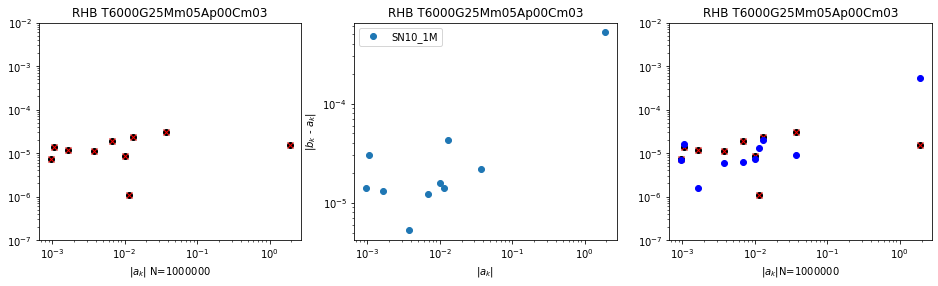

In [272]:
N=1000000
diff1M, bias1M, bias1MX, X1M = b.eval_pca_bias(pmt, N, noise_level=100, snr=None)
b.plot_bias_evals([diff1M], bias1M,biasX= bias1MX, pmt=None, diff_labels=["SN10_1M","SN30_10k","SN10_1M"], N=N)

array([2.20608354e-02, 3.21809748e-04, 4.06772262e-04, 8.19613025e-05,
       1.95410196e-05, 1.36460094e-04, 3.26632682e-04, 3.24538099e-04,
       1.65232667e-04, 1.37377478e-04])

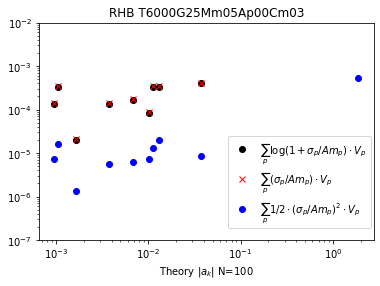

In [318]:
b.plot_theory_bias(ak, bias1k, NL=NL, log=1, theory=1, N=100, lgd=1)

array([2.05739414e-04, 1.08393672e-04, 5.32183136e-05, 1.68496595e-04,
       6.02057993e-05, 3.14577178e-04, 2.90778392e-05, 1.02502030e-04,
       9.97323856e-05, 2.61265365e-04])

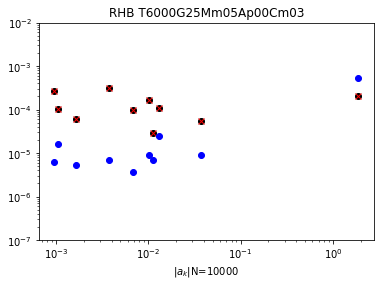

In [317]:
b.plot_theory_bias(ak, bias1kX, NL=NL, log=1, theory=0, N=10000)

array([1.54205716e-05, 2.34346697e-05, 3.07903587e-05, 8.38790796e-06,
       1.15276874e-05, 1.13277389e-05, 1.09047525e-06, 1.36730270e-05,
       1.84836684e-05, 7.11573278e-06])

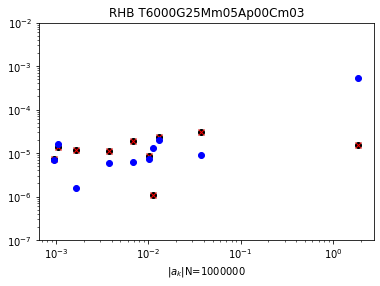

In [312]:
b.plot_theory_bias(ak, bias1MX, NL=NL, log=1, theory=0, N=1000000)

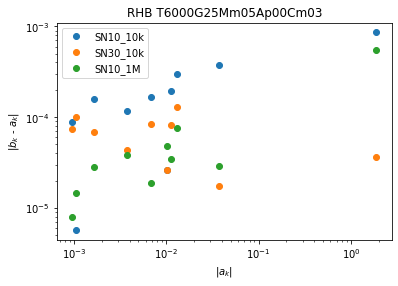

In [300]:
b.plot_exp_bias(ak, diffs, labels=["SN10_10k","SN30_10k","SN10_1M"])